In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
file_path = r"File_path.csv"
# CHANGE FILE PATH! 
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())

Dataset Shape: (1190, 12)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [2]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [3]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359 

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Define features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Identify categorical and numerical columns
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_preprocessed = pipeline.fit_transform(X)



Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_mlp = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))





Epoch 1/50


30/30 [==============================] - 1s 10ms/step - loss: 0.5437 - accuracy: 0.7384 - val_loss: 0.3990 - val_accuracy: 0.8655
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8309 - val_loss: 0.3409 - val_accuracy: 0.8445
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8424 - val_loss: 0.3204 - val_accuracy: 0.8824
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8540 - val_loss: 0.3087 - val_accuracy: 0.8782
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.8456 - val_loss: 0.3035 - val_accuracy: 0.8782
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8634 - val_loss: 0.2995 - val_accuracy: 0.8824
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3265 - accuracy: 0.8666 - val_loss: 0.2987 - val_accuracy: 0.8866
Epoch 8/50
30/

In [7]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data (add an extra dimension for Conv1D)
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define the CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=50, validation_data=(X_test_cnn, y_test))



Epoch 1/50
30/30 [==============================] - 1s 13ms/step - loss: 0.5718 - accuracy: 0.7637 - val_loss: 0.4522 - val_accuracy: 0.8151
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.4172 - accuracy: 0.8183 - val_loss: 0.3760 - val_accuracy: 0.8193
Epoch 3/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3909 - accuracy: 0.8235 - val_loss: 0.3591 - val_accuracy: 0.8445
Epoch 4/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3938 - accuracy: 0.8319 - val_loss: 0.3560 - val_accuracy: 0.8403
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.3929 - accuracy: 0.8382 - val_loss: 0.3498 - val_accuracy: 0.8571
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8351 - val_loss: 0.3474 - val_accuracy: 0.8529
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.3813 - accuracy: 0.8309 - val_loss: 0.3505 - val_accuracy: 0.8403
Epoch 8/50
30/30 [

In [8]:
# Evaluate MLP model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f'MLP Model Accuracy: {mlp_accuracy:.2f}')

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy:.2f}')


8/8 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9202
MLP Model Accuracy: 0.92
8/8 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.8908
CNN Model Accuracy: 0.89


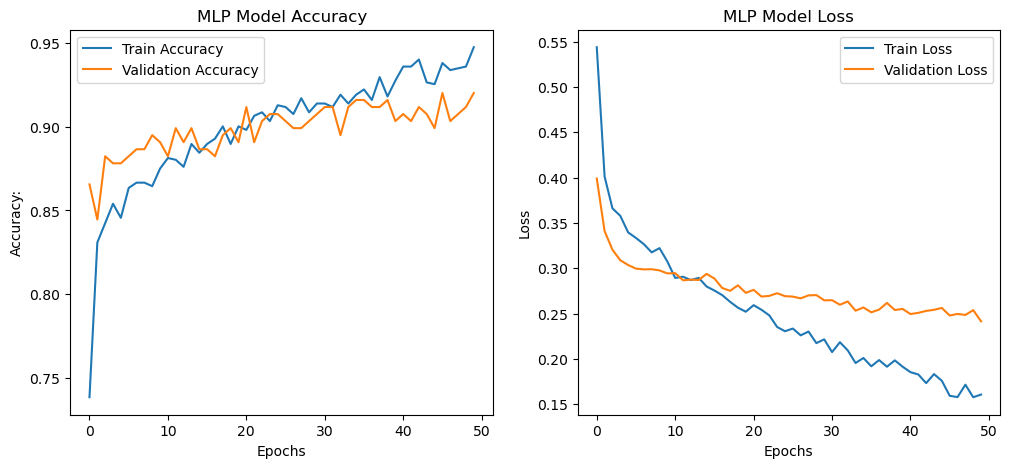

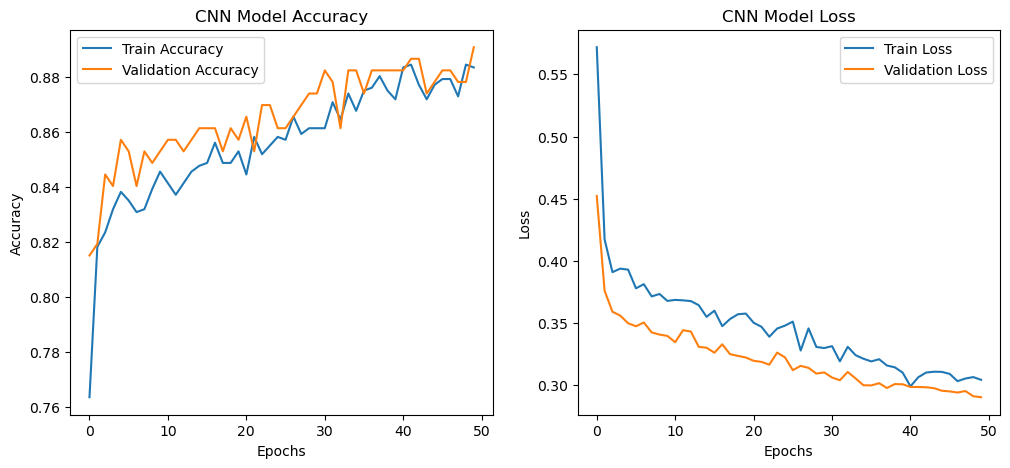

In [9]:
import matplotlib.pyplot as plt

# Plot MLP_training 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy:')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot CNN_training 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
